# PCA - Boston data

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

lr=LinearRegression()
boston=load_boston()
bostondf=pd.DataFrame(boston.data,columns=boston.feature_names)

bostondf['Price']=boston.target
y_target=bostondf['Price']
X_data=bostondf.drop(['Price'],axis=1,inplace=False)

#여기는 수정하지마세요

1. 원본데이터 세트에 선형 회귀를 이용해 cross_val_score로 rmse를 측정하세요.<br>
(빈 코드를 채우고, 개별 rmse와 평균 rmse를 구해서 하단 주석에 적을 것)

In [2]:
neg_mse_scores=cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)

print('CV=5인 경우의 개별 fold별 rmse:',rmse_scores)
print('평균 rmse:{0:.4f}'.format(np.mean(rmse_scores)))

CV=5인 경우의 개별 fold별 rmse: [3.52991509 5.10378498 5.75101191 8.9867887  5.77179405]
평균 rmse:5.8287


cv=5인 경우의 개별 fold별 rmse: [3.52991509 5.10378498 5.75101191 8.9867887  5.77179405]     
평균 rmse(소수 넷째자리까지, 넘파이를 통해 평균 구하기): 5.8287

2. PCA 변환 전 원본데이터 세트에 standardscaler를 적용하세요.

In [3]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(bostondf)

3. 6개의 컴포넌트를 가지도록 PCA변환을 수행 후 선형회귀를 이용해 cross_val_score()로 rmse를 측정하세요. <br>
 (빈 코드를 채우고, 개별 rmse와 평균 rmse를 구해서 하단 주석에 적을 것)

In [4]:
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df_scaled)

neg_mse_scores_pca=cross_val_score(lr, df_pca, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores_pca=np.sqrt(-1*neg_mse_scores_pca)

print('CV=5인 경우의 PCA변환된 개별 fold별 rmse:',rmse_scores_pca)
print('평균 rmse:{0:.4f}'.format(np.mean(rmse_scores_pca)))

CV=5인 경우의 PCA변환된 개별 fold별 rmse: [2.47299718 4.69340612 4.31552121 5.83032209 4.27702702]
평균 rmse:4.3179


cv=5인 경우의 개별 fold별 rmse: [2.47306515 4.69340936 4.31562914 5.8304447  4.27705243]     
평균rmse(소수 넷째자리까지, 넘파이를 통해 평균 구하기): 4.3179

4. 원본데이터와 pca변환데이터 중 예측성능이 더 좋게 나온것은?<br>
(하단 주석에 적을 것)     
: pca변환데이터가 예측 성능이 더 좋다!

# LDA - Wine data

In [5]:
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

wine = load_wine()
winedf=pd.DataFrame(wine.data)

winedf['target'] = wine.target
y_target = winedf['target']
X_data = winedf.drop(['target'], axis=1,inplace=False)

X_data_scaled = StandardScaler().fit_transform(X_data)

In [6]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_data_scaled, wine.target)
X_data_lda = lda.transform(X_data_scaled)

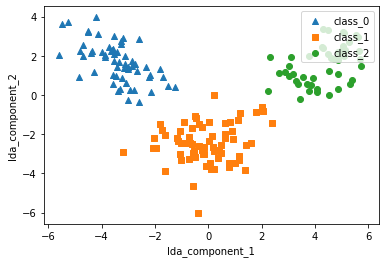

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
wineDF_lda = pd.DataFrame(X_data_lda, columns=lda_columns)
wineDF_lda['target']=wine.target

markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = wineDF_lda[wineDF_lda['target']==i]['lda_component_1']
    y_axis_data = wineDF_lda[wineDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=wine.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

# SVD - Wine data

- n_components를 2개로 하여 SVD를 수행하라.

In [8]:
from sklearn.decomposition import TruncatedSVD
# wine.data를 이용하여 SVD를 수행하라 (DataFrame화 불필요)

wine = load_wine()
wine_ftrs = wine.data

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(wine_ftrs)
wine_tsvd = tsvd.transform(wine_ftrs)

Text(0, 0.5, 'TruncatedSVD Component2')

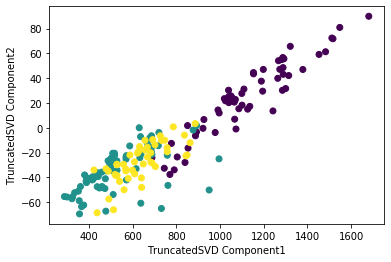

In [9]:
# x축을 component1, y축을 component2로 하며 마커 색상은 target에 따라 달라지는 산점도를 그려보세요
# 색상지정에는 wine.target 활용
plt.scatter(x=wine_tsvd[:, 0], y=wine_tsvd[:, 1], c=wine.target)
plt.xlabel('TruncatedSVD Component1')
plt.ylabel('TruncatedSVD Component2')

- 두개의 component가 전체 데이터를 설명하는 각각의 비율을 구하기(소수점 둘째자리에서 반올림하라):
- Component1: (0.99) / Component2: (0.01)

In [10]:
print(tsvd.explained_variance_ratio_)

[0.98766188 0.01206028]


# NMF - Boston Data

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF

boston=load_boston()
bostondf=pd.DataFrame(boston.data,columns=boston.feature_names)

bostondf['Price']=boston.target

y_target=bostondf['Price']
X_data=bostondf.drop(['Price'],axis=1,inplace=False)

## 1,2번은 linear reg모델이 실행마다 랜덤으로 설정되므로
## mse,rmse,r2_score가 매 시행마다 달라짐.

1.
- 주어진 데이터(X_data,y_target)를 train_test_split함수로 나누세요. (random_state=42,test_size=0.2)
- 그리고 LinearRegression모델을 이용해 테스트 셋의  mse,rmse,r2_score를 구하세요.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)

print("mse={0:.4f},rmse={1:.4f}\nVariance score:{2:.4f}"\
      .format(mse,rmse,r2))

mse=24.2911,rmse=4.9286
Variance score:0.6688


2.
- NMF를 이용해 X_data(train_test_split하기 전 데이터)를 4차원으로 차원축소 하세요.
- 그리고 1번과 동일한 조건으로 트레인셋과 테스트셋으로 나눈후
- LinearRegression모델을 이용해 테스트 셋의  mse,rmse,r2_score를 구하세요.

In [13]:
boston_ftrs = boston.data
nmf = NMF(n_components=4)
nmf.fit(boston_ftrs)
boston_nmf = nmf.transform(boston_ftrs)

X_train, X_test, y_train, y_test = train_test_split(boston_nmf, y_target, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)

print("mse={0:.4f},rmse={1:.4f}\nVariance score:{2:.4f}"\
      .format(mse,rmse,r2))

mse=46.1237,rmse=6.7914
Variance score:0.3710


3.다음중 nmf를 적용할 수 있는 데이터프레임은 무엇인가? (답: 3)

- 1번)정규분포를 따르는 데이터프레임
- 2번)-1부터 1까지의 분포를 따르는 데이터프레임
- 3번)모든 데이터들이 양수인 데이터프레임
- 4번)모든 데이터들이 음수인 데이터프레임